In [132]:
from keras.datasets import imdb

DATA PREPARATION


In [133]:
((x_train,y_train),(x_test,y_test))=imdb.load_data(num_words=10000)

In [134]:
len(x_train),len(x_test)

(25000, 25000)

In [135]:
 word_index=imdb.get_word_index()

In [136]:
index_word=dict([value,key] for (key,value)in word_index.items() )

In [137]:
actual_review=' '.join([index_word.get(idx-3,' ') for idx in x_train[0]])

In [138]:
print(actual_review)

  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert   is an amazing actor and now the same being director   father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for   and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also   to the two little boy's that played the   of norman and paul they were just brilliant children are often left out of the   list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [139]:
import numpy as np

In [140]:
def vectorize_sentence(sentences,dim=10000):
  outputs=np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    outputs[i,idx]=1
  return outputs  


In [141]:
train_vec=vectorize_sentence(x_train)
test_vec=vectorize_sentence(x_test)

In [142]:
train_vec.shape,test_vec.shape

((25000, 10000), (25000, 10000))

In [143]:
from keras import models
from keras.layers import Dense

CREATING A 3 LAYER NETWORK WITH HIDDEN LAYERS HAVING ACTIVATION FUNCTION AS RELU AND THE OUTPUT LAYER HAVING SIGMOID AS ITS ACTIVATION FUNCTION


In [144]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [145]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [146]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                160016    
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Training and Validation

TO AVOID OVERFITTING , WE WILL GIVE 5000 DATA POINTS FOR VALIDATION AND 20000 FOR THE TRAINING 

In [147]:
x_valid=train_vec[:5000]
new_x_train=train_vec[5000:]
y_valid=y_train[:5000]
new_y_train=y_train[5000:]


In [ ]:
hist=model.fit(new_x_train,new_y_train,epochs=20,batch_size=512,validation_data=(x_valid,y_valid))

Epoch 1/20
40/40 [==============================] - 4s 65ms/step - loss: 0.5028 - accuracy: 0.8028 - val_loss: 0.3707 - val_accuracy: 0.8702
Epoch 2/20
40/40 [==============================] - 1s 34ms/step - loss: 0.2901 - accuracy: 0.9024 - val_loss: 0.3215 - val_accuracy: 0.8686
Epoch 3/20
40/40 [==============================] - 1s 35ms/step - loss: 0.2157 - accuracy: 0.9251 - val_loss: 0.2916 - val_accuracy: 0.8812
Epoch 4/20
40/40 [==============================] - 1s 34ms/step - loss: 0.1747 - accuracy: 0.9399 - val_loss: 0.3343 - val_accuracy: 0.8704
Epoch 5/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1475 - accuracy: 0.9495 - val_loss: 0.2813 - val_accuracy: 0.8920
Epoch 6/20
40/40 [==============================] - 2s 41ms/step - loss: 0.1257 - accuracy: 0.9581 - val_loss: 0.2926 - val_accuracy: 0.8904
Epoch 7/20
40/40 [==============================] - 2s 44ms/step - loss: 0.1104 - accuracy: 0.9622 - val_loss: 0.3077 - val_accuracy: 0.8876
Epoch 8/20
40

In [ ]:
import matplotlib.pyplot as plt

In [110]:
h=hist.history

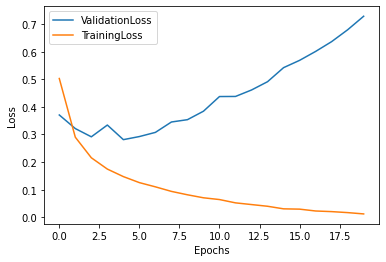

In [111]:
plt.plot(h['val_loss'],label="ValidationLoss")
plt.plot(h['loss'],label="TrainingLoss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

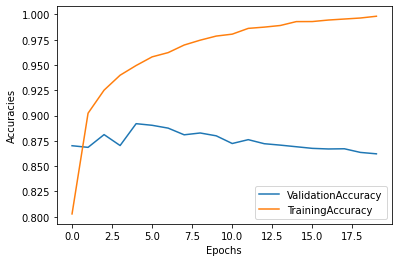

In [114]:
plt.plot(h['val_accuracy'],label="ValidationAccuracy")
plt.plot(h['accuracy'],label="TrainingAccuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

We can see here that after approximately 4 epochs , the validation accuracy is decreasing continously , hence we can set the epochs to be 4

In [148]:
hist=model.fit(new_x_train,new_y_train,epochs=4,batch_size=512,validation_data=(x_valid,y_valid))
h=hist.history

Epoch 1/4
40/40 [==============================] - 2s 40ms/step - loss: 0.4930 - accuracy: 0.8058 - val_loss: 0.3811 - val_accuracy: 0.8552
Epoch 2/4
40/40 [==============================] - 1s 34ms/step - loss: 0.2826 - accuracy: 0.9060 - val_loss: 0.2875 - val_accuracy: 0.8878
Epoch 3/4
40/40 [==============================] - 1s 35ms/step - loss: 0.2113 - accuracy: 0.9267 - val_loss: 0.3793 - val_accuracy: 0.8446
Epoch 4/4
40/40 [==============================] - 1s 34ms/step - loss: 0.1719 - accuracy: 0.9414 - val_loss: 0.2944 - val_accuracy: 0.8848


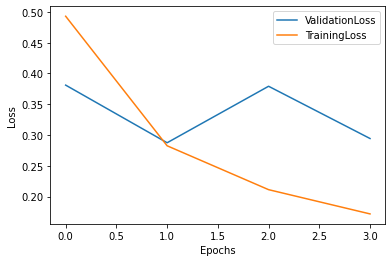

In [149]:
plt.plot(h['val_loss'],label="ValidationLoss")
plt.plot(h['loss'],label="TrainingLoss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

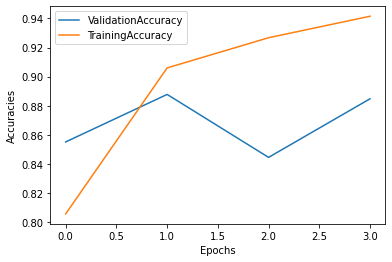

In [150]:
plt.plot(h['val_accuracy'],label="ValidationAccuracy")
plt.plot(h['accuracy'],label="TrainingAccuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

In [151]:
model.evaluate(test_vec,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3121 - accuracy: 0.8754


[0.3121354579925537, 0.8754400014877319]

Our testing accuracy is roughly 87%


In [153]:
model.evaluate(train_vec,y_train)

782/782 [==============================] - 2s 3ms/step - loss: 0.1815 - accuracy: 0.9345


[0.18148095905780792, 0.9344800114631653]